<a href="https://colab.research.google.com/github/it21023996/machine-learning/blob/nlp/News_classification_using_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim==4.3.3 numpy==1.24.3 scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.7 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.1 requires nump

In [1]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("Book1.csv")

In [7]:
df.iloc[2997:3002]

,Label,Text
2997,fake,Gorilla Renesa+ Energy Saving 5 Star Rated Cei...
2998,fake,Luminous Morpheus 1200mm Ceiling Fan (Brown) T...
2999,TRUE,WASHINGTON (Reuters) - The head of a conservat...
3000,TRUE,WASHINGTON (Reuters) - Transgender people will...
3001,TRUE,WASHINGTON (Reuters) - The special counsel inv...


In [9]:
df.Label.value_counts()

,count
Label,
fake,2999
TRUE,2999


In [10]:
df['new_label'] = df['Label'].apply(lambda x:1 if x=='TRUE' else 0)

In [11]:
df.iloc[2997:3002]

,Label,Text,new_label
2997,fake,Gorilla Renesa+ Energy Saving 5 Star Rated Cei...,0
2998,fake,Luminous Morpheus 1200mm Ceiling Fan (Brown) T...,0
2999,TRUE,WASHINGTON (Reuters) - The head of a conservat...,1
3000,TRUE,WASHINGTON (Reuters) - Transgender people will...,1
3001,TRUE,WASHINGTON (Reuters) - The special counsel inv...,1


In [14]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [13]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
def preprocess_and_vectorize(text):
  doc = nlp(text)
  filterd_tokens=[]

  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filterd_tokens.append(token.lemma_)
  return glove_model.get_mean_vector(filterd_tokens)

In [21]:
preprocess_and_vectorize("don't worry Mr.Anusha Chandeep to the jugle")

array([ 0.0100725 , -0.03863506,  0.1348749 , -0.12655579,  0.00610609,
       -0.06498594, -0.07258938,  0.12328859, -0.02393938,  0.08222203,
       -0.02083444,  0.06092529, -0.02584413, -0.01321878,  0.1768727 ,
        0.17946424,  0.10422777, -0.09337936,  0.09901582, -0.1974649 ,
       -0.09829126, -0.00629456,  0.00743874,  0.04230231,  0.1550759 ,
       -0.39592993, -0.12791377,  0.03724595,  0.15750295, -0.006986  ,
        0.4681415 ,  0.29444706,  0.0650904 , -0.11687868, -0.12847386,
       -0.09248589, -0.16252375, -0.09636207,  0.09142572, -0.06770194,
       -0.17242977,  0.07082687,  0.06557714,  0.18116894,  0.23530427,
        0.07159588, -0.0407154 ,  0.16173251, -0.04343583,  0.02819117],
      dtype=float32)

In [22]:
df['vector'] = df['Text'].apply(lambda x:preprocess_and_vectorize(x))

In [23]:
df.iloc[2997:3302]

,Label,Text,new_label,vector
2997,fake,Gorilla Renesa+ Energy Saving 5 Star Rated Cei...,0,"[-0.0006339289, 0.07344255, 0.046446, 0.005517..."
2998,fake,Luminous Morpheus 1200mm Ceiling Fan (Brown) T...,0,"[0.04535826, 0.04853571, 0.042195424, -0.02360..."
2999,TRUE,WASHINGTON (Reuters) - The head of a conservat...,1,"[0.029367963, -0.0040666563, 0.065025695, -0.0..."
3000,TRUE,WASHINGTON (Reuters) - Transgender people will...,1,"[0.014690597, -0.009484049, -0.005528625, -0.0..."
3001,TRUE,WASHINGTON (Reuters) - The special counsel inv...,1,"[0.04916864, -0.018661886, 0.02475495, 3.16813..."
...,...,...,...,...
3297,TRUE,"SACRAMENTO, Calif. (Reuters) - Laura Russo is...",1,"[0.012471423, 0.011932515, 0.070336245, -0.038..."
3298,TRUE,WASHINGTON (Reuters) - The U.S. Justice Depart...,1,"[0.051731918, -0.017918259, 0.006438751, -0.00..."
3299,TRUE,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",1,"[-0.005043953, 0.005351506, -0.0044810744, -0...."
3300,TRUE,WASHINGTON (Reuters) - The U.S. Congress may b...,1,"[0.00547753, 0.012568031, 0.057680257, -0.0288..."


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(df.vector.values,df.new_label,random_state= 2022,test_size=0.2)

In [26]:
x_train.shape
x_test.shape

(1200,)

In [27]:
import numpy as np

In [28]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [30]:
print("before train shape : ",x_train.shape)
print("before test shape : ",x_train.shape)
print("after train shape : ",x_train_2d.shape)
print("after test shape : ",x_train_2d.shape)

before train shape :  (4798,)
before test shape :  (4798,)
after train shape :  (4798, 50)
after test shape :  (4798, 50)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf= GradientBoostingClassifier()

clf.fit(x_train_2d,y_train)
y_pred = clf.predict(x_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       624
           1       1.00      0.99      1.00       576

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [35]:
test_news= [
    "NASA Confirms Water on Mars",
"Eating Chocolate Cures Cancer, Scientists Say",
"New Law Passed to Reduce Plastic Waste by 50%",
"Aliens Landed in New York Last Night, Officials Deny It",
"Global Temperatures Reach Record High in 2023"
]

In [36]:
test_vec_2d = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_vec_2d)

array([1, 0, 1, 1, 0])

<Axes: >

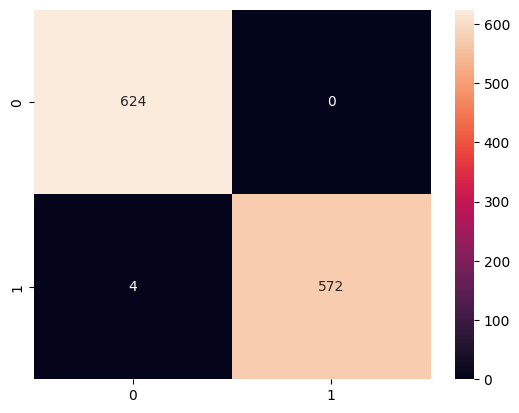

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')